# Problem 1
In this case we have 5 cities

Load all the necessary libraries and the algorithm

In [23]:
import tsplib95
import matplotlib.pyplot as plt
import networkx as nx
import importlib
imported_module = importlib.import_module("tsp_genetic_algorithm")
importlib.reload(imported_module)
from tsp_genetic_algorithm import TSP

Load the original TSP problem

In [24]:
original_problem = tsplib95.load('att48.tsp')

Reduce the problem from 48 to 5 cities

In [25]:
# Extract node coordinates for the first N cities
N = 5
reduced_nodes = {key: original_problem.node_coords[key] for key in list(original_problem.get_nodes())[:N]}

# Create a new TSP problem with only N cities
reduced_problem = tsplib95.models.StandardProblem(comment="Reduced TSP to " + str(N) + "cities")
reduced_problem.node_coords = reduced_nodes

Run the algorithm

In [26]:
tsp = TSP(reduced_problem, 100, 200, 0.8, 0.2, 'roulette_wheel', 'ordered_crossover', 'swap_mutate')
tsp.run()

Initial fitness: 
7.576214880433123e-05
Fitness generation number 0: 
7.576214880433123e-05
Fitness generation number 1: 
7.576214880433123e-05
Fitness generation number 2: 
7.576214880433123e-05
Fitness generation number 3: 
7.576214880433123e-05
Fitness generation number 4: 
7.576214880433123e-05
Fitness generation number 5: 
7.576214880433123e-05
Fitness generation number 6: 
7.576214880433123e-05
Fitness generation number 7: 
7.576214880433123e-05
Fitness generation number 8: 
7.576214880433123e-05
Fitness generation number 9: 
7.576214880433123e-05
Fitness generation number 10: 
7.576214880433123e-05
Fitness generation number 11: 
7.576214880433123e-05
Fitness generation number 12: 
7.576214880433123e-05
Fitness generation number 13: 
7.576214880433123e-05
Fitness generation number 14: 
7.576214880433123e-05
Fitness generation number 15: 
7.576214880433123e-05
Fitness generation number 16: 
7.576214880433123e-05
Fitness generation number 17: 
7.576214880433123e-05
Fitness generati

Create the plots

/tmp/ipykernel_12808/1536209475.py:22: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=[(elite_path[i], elite_path[i + 1]) for i in range(len(elite_path) - 1)], edge_color='blue', width=2)


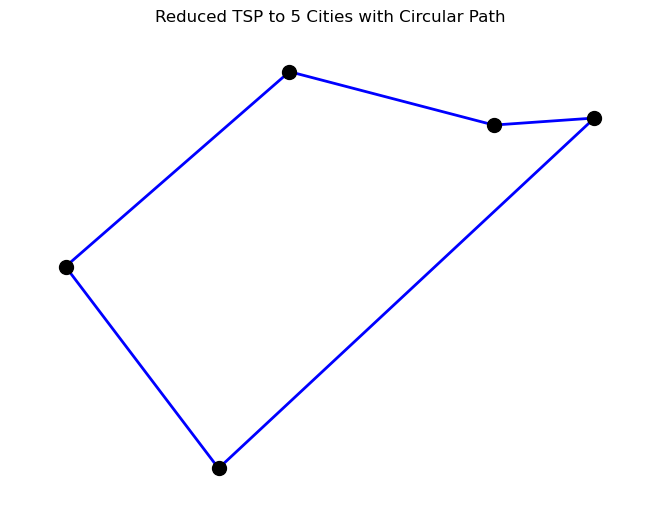

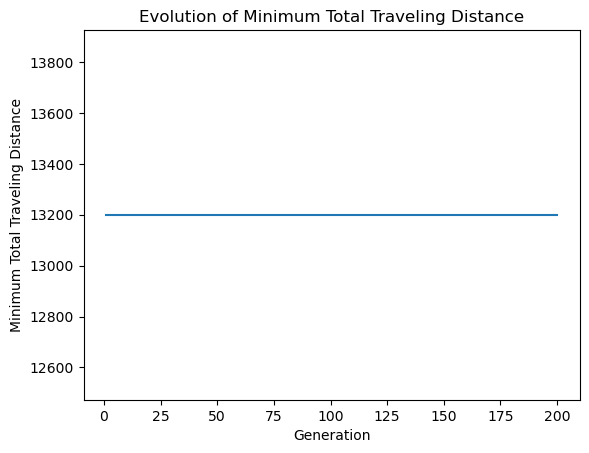

In [27]:
# Assuming reduced_nodes is a dictionary containing node coordinates

# Create a graph and add nodes
G = nx.Graph()
G.add_nodes_from(reduced_nodes.keys())

# Draw the nodes
pos = {node: (reduced_nodes[node][0], reduced_nodes[node][1]) for node in reduced_nodes}
nx.draw(G, pos, node_color='black', with_labels=False, node_size=100)

# Draw the circular path stored in tsp.elite[0]
elite_path = tsp.elite[0]  # Assuming tsp.elite[0] contains the circular path

# Add edges for the circular path
for i in range(len(elite_path) - 1):
    G.add_edge(elite_path[i], elite_path[i + 1])

# Connect the last and first nodes to complete the circular path
G.add_edge(elite_path[-1], elite_path[0])

# Draw the edges
nx.draw_networkx_edges(G, pos, edgelist=[(elite_path[i], elite_path[i + 1]) for i in range(len(elite_path) - 1)], edge_color='blue', width=2)
nx.draw_networkx_edges(G, pos, edgelist=[(elite_path[-1], elite_path[0])], edge_color='blue', width=2)

plt.title('Reduced TSP to ' + str(N) +' Cities with Circular Path')
plt.show()


plt.plot(range(1, len(tsp.evolution_data) + 1), tsp.evolution_data, linestyle='-')
plt.title('Evolution of Minimum Total Traveling Distance')
plt.xlabel('Generation')
plt.ylabel('Minimum Total Traveling Distance')
plt.show()